In [1]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [3]:
# Path ke folder gambar yang sudah diproses
processed_folder = 'D:\\projek\\FIX\\drowsiness-detection\\combined_images'

In [6]:
# Load MobileNet dengan bobot yang sudah dilatih sebelumnya, tanpa lapisan atas
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(64, 64, 3))
base_model.trainable = False  # Membekukan lapisan dasar

C:\Users\user\AppData\Local\Temp\ipykernel_2384\1758498307.py:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(64, 64, 3))


In [25]:
# Tambahkan lapisan baru untuk klasifikasi biner
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.4)(x)
predictions = Dense(1, activation='sigmoid')(x)  # Lapisan output bine

In [26]:
# Definisikan model
model = Model(inputs=base_model.input, outputs=predictions)

# Kompilasi model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Tampilkan ringkasan model
model.summary()


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 32, 32, 32)     │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 32, 32, 32)     │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 32, 32, 32)     │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 32, 32, 64)     │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 33, 33, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 16, 16, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 16, 16, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 16, 16, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 16, 16, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 3,360,193 (12.82 MB)

 Trainable params: 131,329 (513.00 KB)

 Non-trainable params: 3,228,864 (12.32 MB)

In [27]:
# Image data generator dengan augmentasi data
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=5,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    brightness_range=[0.9, 1.1],
    validation_split=0.2
)

In [28]:
# Generator untuk training dan validasi
train_generator = train_datagen.flow_from_directory(
    processed_folder,
    target_size=(64, 64),
    color_mode='rgb',  # Gunakan RGB karena MobileNet membutuhkan 3 channel
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    processed_folder,
    target_size=(64, 64),
    color_mode='rgb',
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 1958 images belonging to 2 classes.
Found 488 images belonging to 2 classes.


In [29]:
# Callback untuk early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [30]:
# Latih model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=20,
    callbacks=[early_stopping]
)

Epoch 1/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 23s 252ms/step - accuracy: 0.7664 - loss: 0.4605 - val_accuracy: 0.8625 - val_loss: 0.3723
Epoch 2/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.1939 - val_accuracy: 0.7500 - val_loss: 0.5345
Epoch 3/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 13s 217ms/step - accuracy: 0.9162 - loss: 0.2145 - val_accuracy: 0.8396 - val_loss: 0.3455
Epoch 4/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9062 - loss: 0.1849 - val_accuracy: 1.0000 - val_loss: 0.3149
Epoch 5/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 14s 226ms/step - accuracy: 0.9223 - loss: 0.2112 - val_accuracy: 0.8417 - val_loss: 0.3538
Epoch 6/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9375 - loss: 0.1969 - val_accuracy: 1.0000 - val_loss: 0.1455
Epoch 7/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 13s 217ms/step - accuracy: 0.9196 - loss: 0.1807 - val_accuracy: 0.8479 - val_loss: 0.3421
Epoch 8/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9062 - loss: 0.2004 - val_accuracy: 0.8750

In [31]:
# Mendapatkan akurasi dan loss validasi terakhir
final_val_accuracy = history.history['val_accuracy'][-1]
final_val_loss = history.history['val_loss'][-1]
print(f"Akurasi Validasi (terakhir): {final_val_accuracy * 100:.2f}%")
print(f"Loss Validasi (terakhir): {final_val_loss:.4f}")

# Simpan model
model.save('mobilenet_drowsiness_detection_model.h5')
print("Model telah disimpan dengan nama 'mobilenet_drowsiness_detection_model.h5'")


Akurasi Validasi (terakhir): 87.71%
Loss Validasi (terakhir): 0.2922
Model telah disimpan dengan nama 'mobilenet_drowsiness_detection_model.h5'


Akurasi Validasi (terakhir): 87.71%
Loss Validasi (terakhir): 0.2922
Model telah disimpan dengan nama 'mobilenet_drowsiness_detection_model.h5'


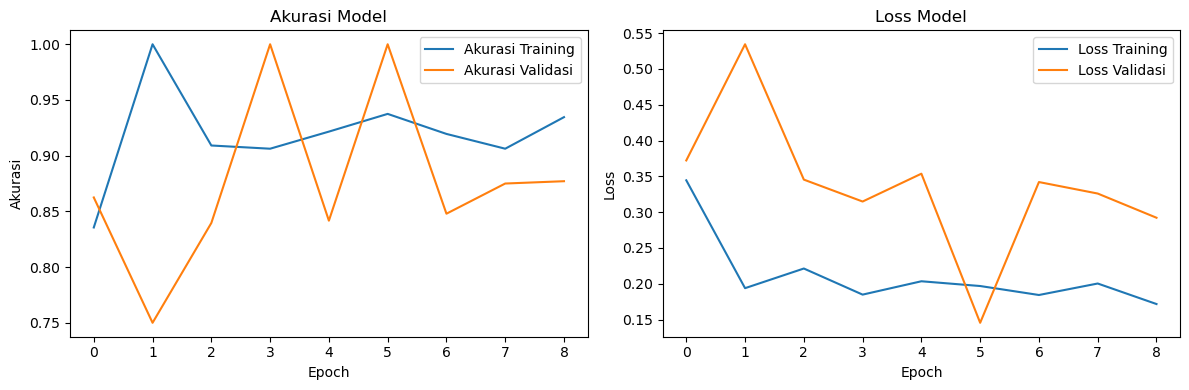

In [ ]:
# Mendapatkan akurasi dan loss validasi terakhir
final_val_accuracy = history.history['val_accuracy'][-1]
final_val_loss = history.history['val_loss'][-1]
print(f"Akurasi Validasi (terakhir): {final_val_accuracy * 100:.2f}%")
print(f"Loss Validasi (terakhir): {final_val_loss:.4f}")   

# Simpan model
model.save('mobilenet_drowsiness_detection_model.h5')
print("Model telah disimpan dengan nama 'mobilenet_drowsiness_detection_model.h5'")

# Visualisasi hasil training
plt.figure(figsize=(12, 4))

# Plot akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Akurasi Training')
plt.plot(history.history['val_accuracy'], label='Akurasi Validasi')
plt.title('Akurasi Model')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss Training')
plt.plot(history.history['val_loss'], label='Loss Validasi')
plt.title('Loss Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()